# Import data

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from torch.optim import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import TensorDataset
import warnings
warnings.filterwarnings('ignore')

In [218]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> * df has 1599 rows and 12 columns. Each column is complete with no null values. <br>
> * All feature columns are of data type float64 and the quality column is an int64 type.

In [220]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

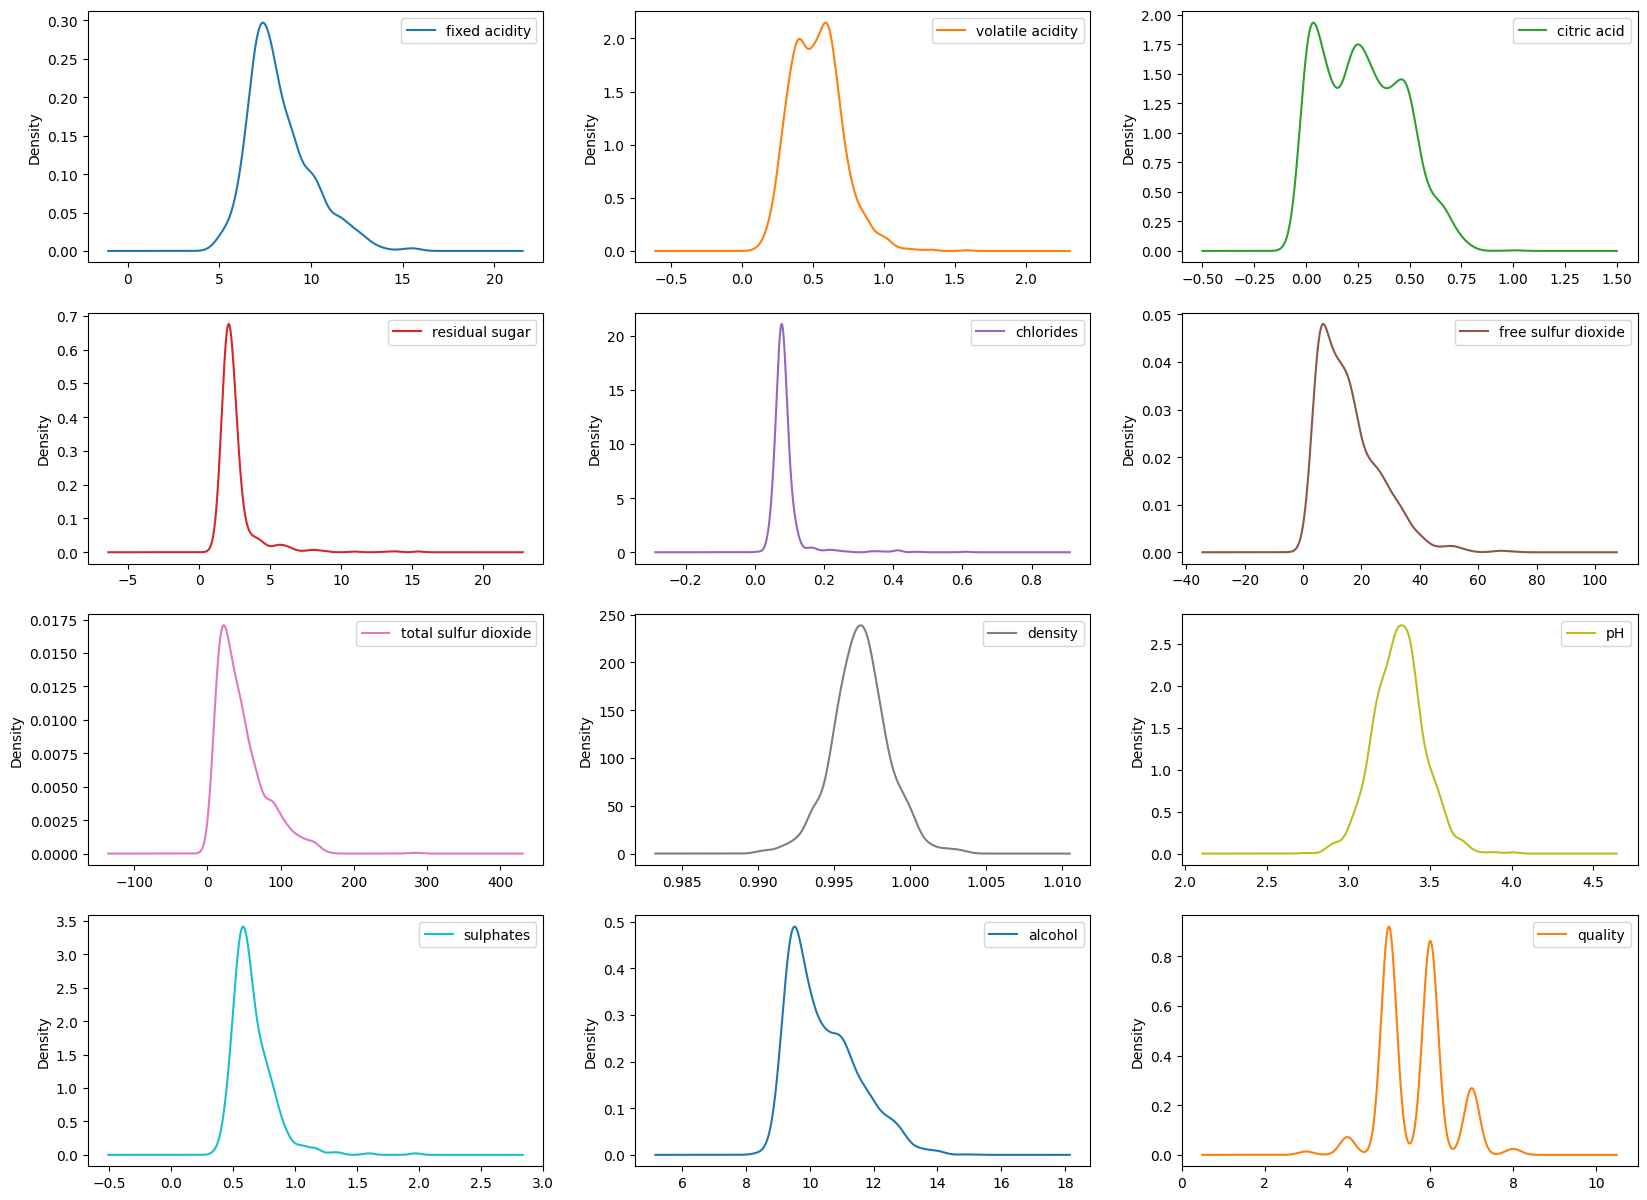

In [221]:
df.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (20, 15))

> Observations : 
> * Fixed Acidity: The mean is higher than the median and the max is quite far from the 75th percentile which suggests a skewed distribution.<br>
> * Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide: These also show a large difference between the 75th percentile and max values, indicating skewness. <br>
> * Desnsity, pH: Mean and median are close and this suggests slightly a normal distribution. <br>
> * In conclusion, most distributions do not follow a gaussian distribution.

In [222]:
skew = df.agg(['skew']).T
skew

,skew
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,4.540655
chlorides,5.680347
free sulfur dioxide,1.250567
total sulfur dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


> * Fixed acidity, volatile acidity, citric acid, density, pH, alcohol, and quality show a slight to moderate positive skew meaning there are relatively more high values pulling the distribution to the right. <br>
> * Residual sugar, chlorides, free sulfur dioxide, and total sulfur dioxide have high positive skewness indicating a more pronounced tail towards higher values.

In [223]:
df.groupby("quality").size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

> quality column appears is categorical with integer values ranging from 3 to 8 representing different levels of quality for wine.

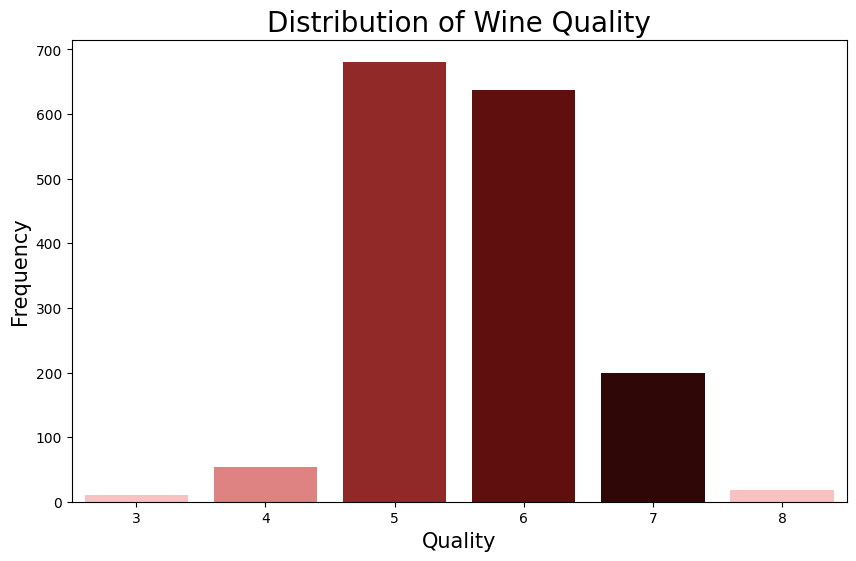

In [225]:
colors = ['#ffb9b9', '#ee7272', '#a31818', '#6d0202', '#360000']
quality_counts = df['quality'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=wine_colors)
plt.title('Distribution of Wine Quality', fontsize=20)
plt.xlabel('Quality', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

> * The majority of wines fall into the middle-quality categories, with quality ratings of 5 and 6 being the most common, as indicated by the taller bars.
> * These two categories together account for a significant portion of the dataset, suggesting that most wines are considered to be of average quality.
> * The high-quality category of 8 has the least frequency, indicating such wines are rare.
> * The low-quality ratings of 3 and 4 also have significantly fewer wines compared to the middle ratings, suggesting that there are fewer poor-quality wines.

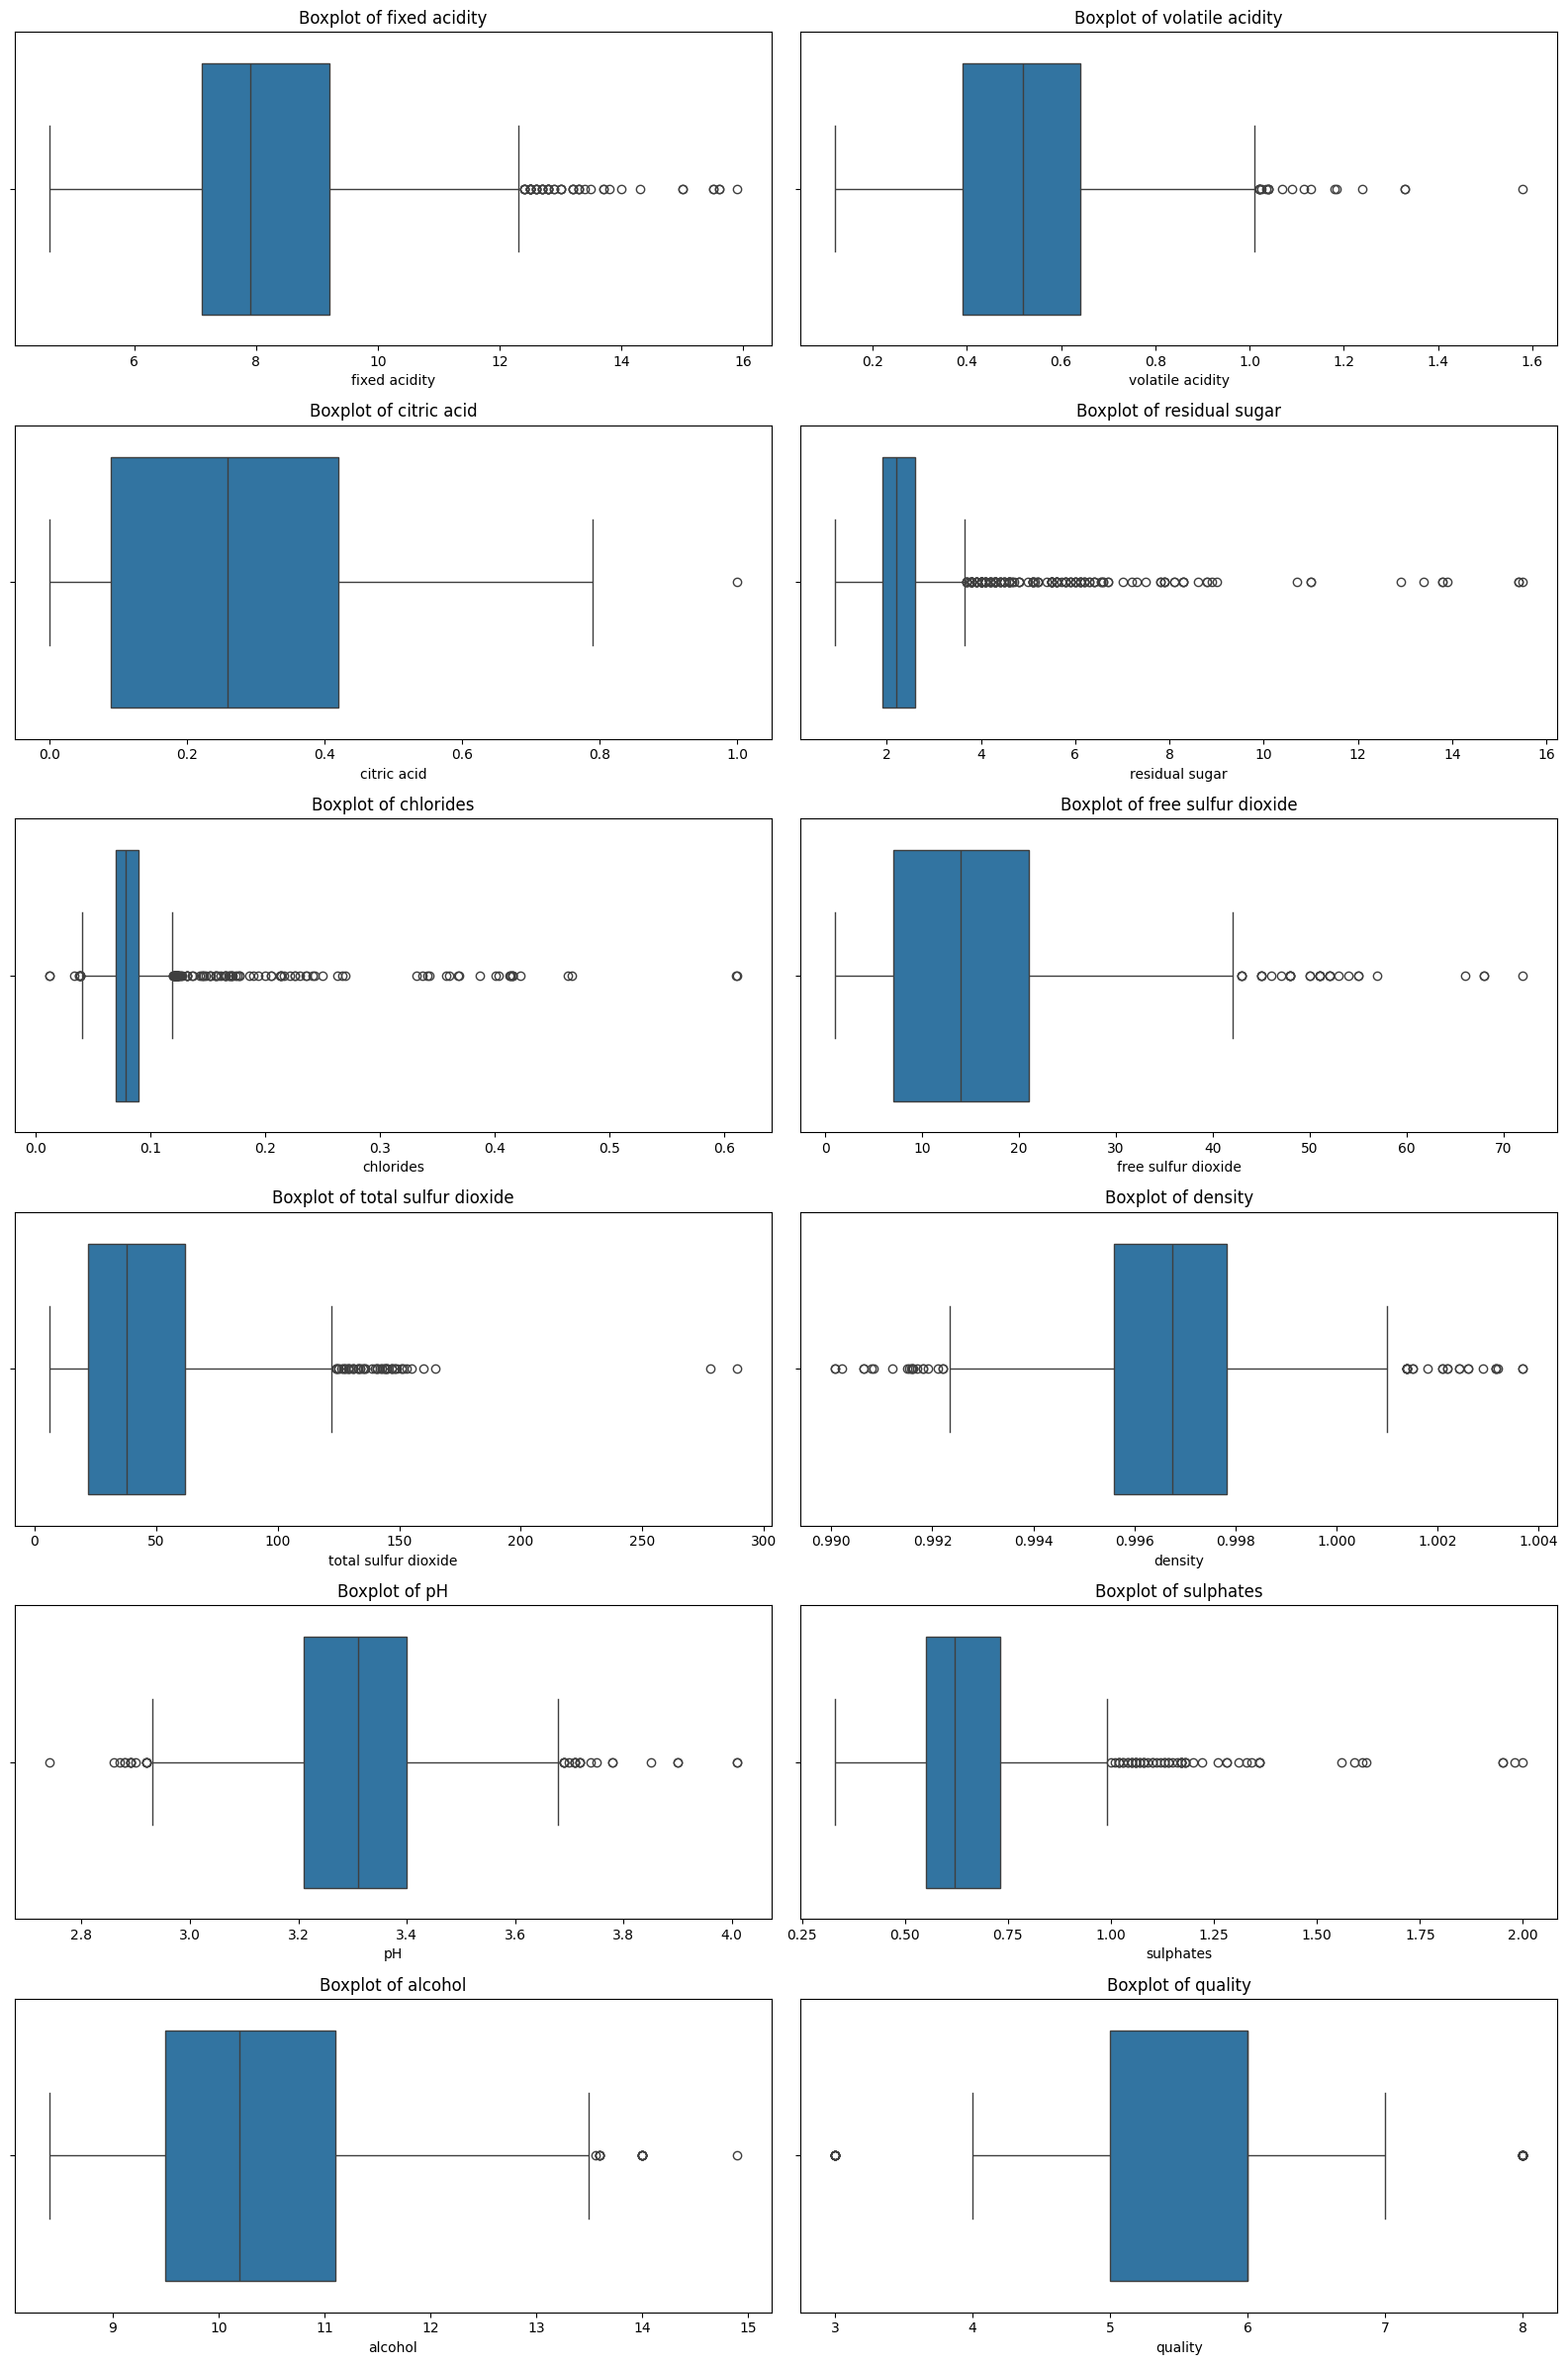

In [226]:
# Select only the numeric features from the DataFrame
numeric_features = df.select_dtypes(include=['float64', 'int64'])
num_features = len(numeric_features.columns)
# Calculate the number of rows needed for subplots based on the number of features
# We divide by 2 because we want 2 plots per row
num_rows = (num_features) // 2 
# Create a subplot grid of the calculated size, with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize = (16, num_rows * 4))  
axes = axes.flatten() 
# Iterate over the numeric features and their respective axes to create boxplots
for i, feature in enumerate(numeric_features.columns):
    sns.boxplot(x = df[feature], ax = axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show() 

> * Outliers are present in all features except citric acid, which has only 1. 

<Axes: >

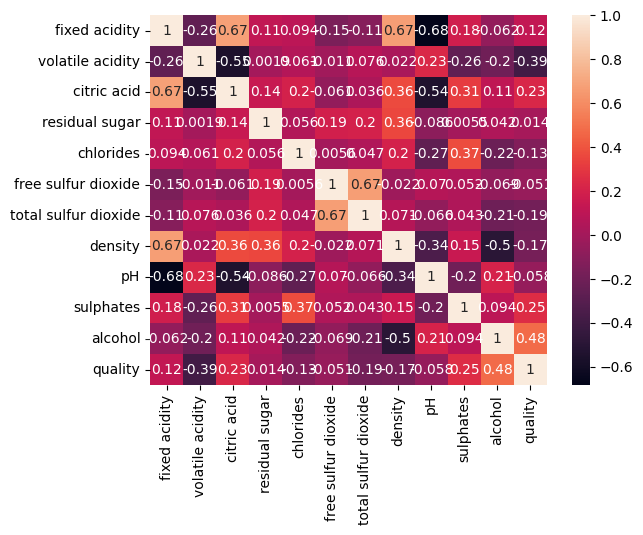

In [227]:
sns.heatmap(df.corr(), annot=True)

> * The highest correlated feature with the target (quality) is alcohol with a 0.48 correlation.

# Creating a basic MLP

In [228]:
df.shape

(1599, 12)

In [229]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [230]:
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [231]:
# Split the dataset into training plus validation set and a test set with 20% of the data reserved for testing. 
# Then further split the training set into separate training and validation sets, 
# with the validation set containing 25% of the training plus validation set. 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [232]:
# Converting data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.FloatTensor(y_val.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.LongTensor(y_test.values)

In [233]:
# Creating TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [234]:
# Creating DataLoaders
batch_size = 64 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [235]:
# Defining the MLP Model
class BasicMLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_units=5):
        super(BasicMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [236]:
# Applying the model
model = BasicMLP(input_size=X_train_tensor.shape[1], output_size=1)
model

BasicMLP(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)

In [237]:
# Useing Mean Squared Error Loss 
# Initializing the optimizer
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [238]:
# Training and Validation on the Model
epochs = 100
loss_valid = []
loss_train = []

for epoch in range(epochs):
    model.train()
    epoch_loss_train = []
    for features, targets in train_loader:
        output = model(features)  # Forward pass
        loss = criterion(output, targets.unsqueeze(1))  # Calculating loss
        epoch_loss_train.append(loss.item())
        optimizer.zero_grad()  # Clearing previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Updating weights
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    model.eval()
    with torch.no_grad():  # Disabling gradient computation for validation
        val_losses = []
        for features, targets in val_loader:
            output = model(features)
            loss = criterion(output, targets.unsqueeze(1))
            val_losses.append(loss.item())
        loss_valid.append(sum(val_losses) / len(val_losses))

    print(f'Epoch {epoch}, Train Loss: {loss_train[-1]}, Validation Loss: {loss_valid[-1]}')

Epoch 0, Train Loss: 55.52192611694336, Validation Loss: 35.05739517211914
Epoch 1, Train Loss: 32.24584414164225, Validation Loss: 26.247948837280273
Epoch 2, Train Loss: 22.738778177897135, Validation Loss: 15.862285804748534
Epoch 3, Train Loss: 14.712937100728352, Validation Loss: 11.237276649475097
Epoch 4, Train Loss: 12.593187141418458, Validation Loss: 10.577401161193848
Epoch 5, Train Loss: 12.110747273763021, Validation Loss: 10.218935775756837
Epoch 6, Train Loss: 11.715182813008626, Validation Loss: 9.899932479858398
Epoch 7, Train Loss: 11.36725705464681, Validation Loss: 9.586018371582032
Epoch 8, Train Loss: 11.04429588317871, Validation Loss: 9.299000549316407
Epoch 9, Train Loss: 10.725485483805338, Validation Loss: 9.018659782409667
Epoch 10, Train Loss: 10.39605458577474, Validation Loss: 8.742240715026856
Epoch 11, Train Loss: 10.084529527028401, Validation Loss: 8.464223289489746
Epoch 12, Train Loss: 9.758871332804363, Validation Loss: 8.194290351867675
Epoch 13, 

In [239]:
# Testing the Model
model.eval()
test_losses = []
with torch.no_grad():
    for features, targets in test_loader:
        output = model(features)
        loss = criterion(output, targets.unsqueeze(1))
        test_losses.append(loss.item())

test_loss = sum(test_losses) / len(test_losses)
print(f'Test MSE: {test_loss}')

Test MSE: 0.5822172403335572


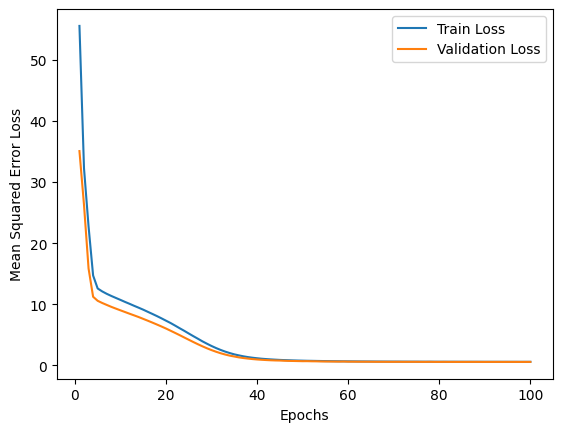

In [240]:
# Plotting training and validation losses over epochs
def plot_loss_curves(epochs, loss_train, loss_valid):
    plt.plot(epochs, loss_train, label='Train Loss')
    plt.plot(epochs, loss_valid, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error Loss')  
    plt.legend()
    plt.show()

plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), loss_train, loss_valid)

> * According to the test results the model achieved a Mean Squared Error of approximately 0.5822 on the test set
> * The loss curves indicate that the model's training and validation losses decreased and converged over the epochs, which shows that the model learned effectively from the data without signs of overfitting or underfitting, as the validation loss closely follows the training loss.

# Making changes to basic MLP

In [241]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_scaled_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_scaled_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_scaled_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_scaled_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_scaled_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

class ImprovedMLP(nn.Module):
    def __init__(self, input_size):
        super(ImprovedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)  # Increased from 5 to 10 units
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Adding dropout for regularization
        self.fc2 = nn.Linear(10, 10)  # Additional hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(10, 1)  # Output layer 

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model2 = ImprovedMLP(input_size=X_train_scaled_tensor.shape[1])
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)

epochs = 100
loss_valid = []
loss_train = []

for epoch in range(epochs):
    model2.train()
    epoch_loss_train = []
    for features, targets in train_loader:
        output = model2(features)  # Forward pass
        loss = criterion(output, targets.unsqueeze(1))  # Calculating loss
        epoch_loss_train.append(loss.item())
        optimizer.zero_grad()  # Clearing previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Updating weights
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    model2.eval()
    epoch_loss_valid = []  
    with torch.no_grad():  # Disabling gradient computation for validation
        for features, targets in val_loader:
            output = model2(features)
            loss = criterion(output, targets.unsqueeze(1))
            epoch_loss_valid.append(loss.item())
    loss_valid.append(sum(epoch_loss_valid) / len(epoch_loss_valid))

    # Displaying train and validation loss for the current epoch
    print(f'Epoch {epoch}, Train Loss: {loss_train[-1]}, Validation Loss: {loss_valid[-1]}')

Epoch 0, Train Loss: 24.665317153930665, Validation Loss: 15.97410774230957
Epoch 1, Train Loss: 8.489384094874064, Validation Loss: 1.5661074638366699
Epoch 2, Train Loss: 2.3996807893117267, Validation Loss: 0.8315813302993774
Epoch 3, Train Loss: 0.9304330348968506, Validation Loss: 0.6405464172363281
Epoch 4, Train Loss: 0.7393972436587016, Validation Loss: 0.5610053181648255
Epoch 5, Train Loss: 0.6362798631191253, Validation Loss: 0.5482126832008362
Epoch 6, Train Loss: 0.6028187731901805, Validation Loss: 0.5402849555015564
Epoch 7, Train Loss: 0.571876859664917, Validation Loss: 0.5306771278381348
Epoch 8, Train Loss: 0.5522549629211426, Validation Loss: 0.5248574852943421
Epoch 9, Train Loss: 0.5714853564898174, Validation Loss: 0.523167073726654
Epoch 10, Train Loss: 0.5244568804899852, Validation Loss: 0.519416618347168
Epoch 11, Train Loss: 0.5327442069848378, Validation Loss: 0.5180451452732087
Epoch 12, Train Loss: 0.5475094834963481, Validation Loss: 0.5133256077766418
E

In [242]:
# Testing the Model 2
model2.eval()  
test_losses = []
with torch.no_grad():  # No gradients needed for evaluation
    for features, targets in test_loader:
        output = model2(features)  # Forward pass with model 2
        loss = criterion(output, targets.unsqueeze(1))  # Calculating the loss
        test_losses.append(loss.item())  # Appending the loss for this batch

test_loss = sum(test_losses) / len(test_losses)  # Calculate the average loss over all test batches
print(f'Test MSE for Model 2: {test_loss}')

Test MSE for Model 2: 0.4159207582473755


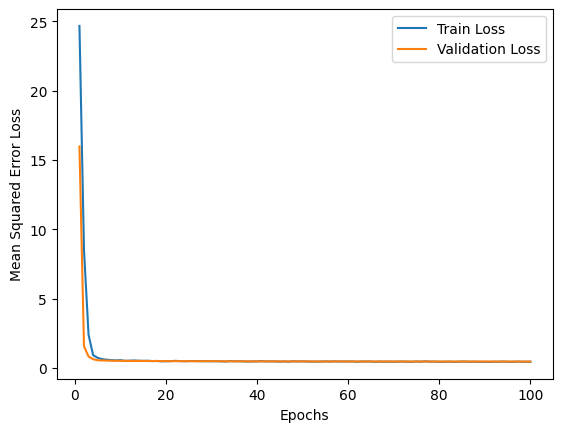

In [243]:
# Plotting training and validation losses over epochs
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), loss_train, loss_valid)

> * Model 2 achieved a test MSE of approximately 0.4159, which is an improvement over the previous models MSE of approximately 0.5822.
> * This suggests that the changes made—specifically, increasing the number of hidden units and adding a dropout layer—were successful in enhancing the model's predictive accuracy on the test set.
> * The addition of more hidden units helped the model capture more complex patterns in the data.
> * The dropout layer contributed to regularization potentially reducing overfitting by preventing co-adaptations on training data.
> * In addition to increasing the number of hidden units and introducing dropout regularization I incorporated data preprocessing through feature scaling with StandardScaler which helped in normalizing the range of independent variables
> * I also changed the optimizer to use a mometum of 0.9, this might have led to the faster convergence that we see
> * The loss curves show a rapid decrease in the initial epochs with both training and validation losses converging to a low and stable value indicating good generalization.
> * There's no significant gap between the training and validation losses suggesting that the model has not overfit to the training data.

# Feature engineering

In [143]:
new_df = df.copy()
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
def new_features(df):
    df.columns = df.columns.str.replace(' ', '_')
    df['acidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']
    df['acidity_to_pH_ratio'] = df['acidity'] / df['pH']
    df['alkalinity'] = df['pH'] + df['alcohol']
    df['minerals'] = df['chlorides'] + df['sulphates'] + df['residual_sugar']
    df = df.replace([np.inf, -np.inf], 0)
    df = df.dropna()
    return df

In [145]:
new_df = new_features(new_df)
new_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,acidity,acidity_to_pH_ratio,alkalinity,minerals
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,2.307692,12.91,2.536
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68,2.712500,13.00,3.378
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.60,2.638037,13.06,3.042
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,12.04,3.810127,12.96,2.555
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,2.307692,12.91,2.536


In [146]:
X = new_df.drop("quality", axis=1)
y = new_df["quality"]

In [147]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_scaled_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_scaled_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_scaled_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_scaled_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_scaled_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

class ImprovedMLP(nn.Module):
    def __init__(self, input_size):
        super(ImprovedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)  # Increased from 5 to 10 units
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Adding dropout for regularization
        self.fc2 = nn.Linear(10, 10)  # Additional hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(10, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model3 = ImprovedMLP(input_size=X_train_scaled_tensor.shape[1])
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)

epochs = 100
loss_valid = []
loss_train = []

for epoch in range(epochs):
    model3.train()
    epoch_loss_train = []
    for features, targets in train_loader:
        output = model3(features)  # Forward pass
        loss = criterion(output, targets.unsqueeze(1))  # Calculating loss
        epoch_loss_train.append(loss.item())
        optimizer.zero_grad()  # Clearing previous gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Updating weights
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    model3.eval()
    epoch_loss_valid = [] 
    with torch.no_grad():  # Disabling gradient computation for validation
        for features, targets in val_loader:
            output = model3(features)
            loss = criterion(output, targets.unsqueeze(1))
            epoch_loss_valid.append(loss.item())
    loss_valid.append(sum(epoch_loss_valid) / len(epoch_loss_valid))

    # Displaying train and validation loss for the current epoch
    print(f'Epoch {epoch}, Train Loss: {loss_train[-1]}, Validation Loss: {loss_valid[-1]}')

Epoch 0, Train Loss: 27.456381352742515, Validation Loss: 18.648517990112303
Epoch 1, Train Loss: 10.744480895996094, Validation Loss: 2.168216419219971
Epoch 2, Train Loss: 2.649580176671346, Validation Loss: 0.8855504274368287
Epoch 3, Train Loss: 1.182075015703837, Validation Loss: 0.7346856951713562
Epoch 4, Train Loss: 0.847278094291687, Validation Loss: 0.5408699989318848
Epoch 5, Train Loss: 0.6390451689561208, Validation Loss: 0.5097332417964935
Epoch 6, Train Loss: 0.644320273399353, Validation Loss: 0.5026317477226258
Epoch 7, Train Loss: 0.579969875017802, Validation Loss: 0.4993841052055359
Epoch 8, Train Loss: 0.5763285497824351, Validation Loss: 0.49773837327957154
Epoch 9, Train Loss: 0.5420575161774953, Validation Loss: 0.49554033279418946
Epoch 10, Train Loss: 0.5304751296838125, Validation Loss: 0.494028651714325
Epoch 11, Train Loss: 0.5071451971928279, Validation Loss: 0.489786821603775
Epoch 12, Train Loss: 0.5197197675704956, Validation Loss: 0.48869245052337645
E

In [148]:
# Testing the Model 2
model3.eval()  # Set the model to evaluation mode
test_losses = []
with torch.no_grad():  # No gradients are needed for evaluation
    for features, targets in test_loader:
        output = model3(features)  # Forward pass with model 2
        loss = criterion(output, targets.unsqueeze(1))  # Calculate the loss
        test_losses.append(loss.item())  # Append the loss for this batch

test_loss = sum(test_losses) / len(test_losses)  # Calculate the average loss over all test batches
print(f'Test MSE for Model 3: {test_loss}')

Test MSE for Model 3: 0.39552887082099913


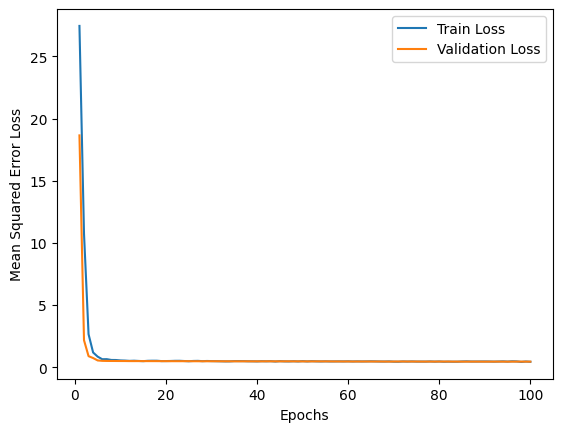

In [149]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), loss_train, loss_valid)

> * In Model 3, feature engineering was introduced as a strategy to improve model performance by creating new features that could potentially reveal more significant relationships within the data.
> * The new features created include:
    - acidity: a sum of fixed, volatile, and citric acids, which could represent the overall acidity more effectively than the individual features alone.
    - acidity_to_pH_ratio: a ratio that might capture the balance between total acidity and pH value, possibly a critical factor in wine quality.
    - alkalinity: a sum of the pH and alcohol content, which could also be related to the wine's overall balance.
    - minerals: a sum of chlorides, sulphates, and residual sugar, providing a combined measure of mineral content and sweetness.
> * The Mean Squared Error for Model 3 is approximately 0.3955, which is a slight improvement over Model 2 (MSE of approximately 0.4159). This indicates that the additional features may indeed carry valuable information that helps the model make more accurate predictions.
> * The loss curves for Model 3 appear to show a good fit as well the training and validation losses decrease sharply and then level off indicating that the model is learning effectively and generalizing well from the training data to the unseen validation data without showing signs of overfitting or underfitting.
> * The convergence of the train and validation loss also suggests that the new features did not negatively impact the model's ability to generalize, which could have been a risk if the new features had introduced noise or redundancy.
> * The improvement in MSE from the first model to the third is approximately 30.36%

# Optional: Implementing the MLP

* Note : Sigmoid from https://github.com/cthorey/CS231/blob/master/assignment3/cs231n/rnn_layers.py

In [210]:
class BasicMLPImp:
    def relu(x):
        return np.maximum(0, x)

    def sigmoid(x):
        pos_mask = (x >= 0)
        neg_mask = (x < 0)
        z = np.zeros_like(x)
        z[pos_mask] = np.exp(-x[pos_mask])
        z[neg_mask] = np.exp(x[neg_mask])
        top = np.ones_like(x)
        top[neg_mask] = z[neg_mask]
        return top / (1 + z)

    def mse_loss(y_true, y_pred):
        return ((y_true - y_pred) ** 2).mean()

    def mse_loss_derivative(self, y_true, y_pred):
        return y_pred - y_true
    
    def __init__(self, hidden_layer_tuple, activation_tuple):
        self.weights = []
        self.biases = []
        self.activations = []

        # Initializing weights and biases
        for i in range(len(hidden_layer_tuple) - 1):
            input_units = hidden_layer_tuple[i]
            output_units = hidden_layer_tuple[i + 1]
            
            # Initialization for weights for ReLU activation
            weight = np.random.randn(input_units, output_units) * np.sqrt(2. / input_units)
            bias = np.zeros((1, output_units))
            self.weights.append(weight)
            self.biases.append(bias)

            # Set activation functions
            if activation_tuple[i] == 'relu':
                self.activations.append(relu)
            elif activation_tuple[i] == 'sigmoid':
                self.activations.append(sigmoid)

    def forward(self, X):
        self.layer_inputs = []  # Storing input for each layer 
        self.layer_outputs = [X]  # Storing output for each layer
        
        for weight, bias, activation in zip(self.weights, self.biases, self.activations):
            X = np.dot(X, weight) + bias
            self.layer_inputs.append(X)
            X = activation(X)
            self.layer_outputs.append(X)
            
        return X

    def backprop(self, y_true, learning_rate=0.01):
        # Computing the gradient on the output layer
        d_loss_output = self.mse_loss_derivative(y_true, self.layer_outputs[-1])
        
        for i in reversed(range(len(self.activations))):
            # Computing the gradient of the activation
            if self.activations[i] == relu:
                # ReLU derivative is 1 for positive inputs 0 otherwise
                d_activation = (self.layer_inputs[i] > 0).astype(float)
            elif self.activations[i] == sigmoid:
                # Sigmoid derivative
                sig = self.layer_outputs[i+1]
                d_activation = sig * (1 - sig)
            else:
                # Linear activation derivative is 1
                d_activation = 1
            
            # Combine the two parts
            d_loss_layer = d_loss_output * d_activation
            
            # Gradient with respect to weights and biases
            d_weight = np.dot(self.layer_outputs[i].T, d_loss_layer)
            d_bias = np.sum(d_loss_layer, axis=0, keepdims=True)

            # Update the gradients
            self.weights[i] -= learning_rate * d_weight
            self.biases[i] -= learning_rate * d_bias

            # If not the first layer backpropagate the error
            if i > 0:
                d_loss_output = np.dot(d_loss_layer, self.weights[i].T)

In [211]:
X = df.drop('quality', axis=1).values
y = df['quality'].values.reshape(-1, 1)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp = BasicMLPImp(hidden_layer_tuple=(11, 5, 1), activation_tuple=('relu', 'none'))

In [216]:
epochs = 100
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass: compute the predictions
    predictions = mlp.forward(X_train_scaled)
    # Backward pass: update weights
    mlp.backprop(y_train, learning_rate)

    # Compute and print loss every 10 epochs
    if epoch % 10 == 0:
        loss = BasicMLPImp.mse_loss(y_train, predictions)
        print(f"Epoch {epoch}, Loss: {loss}")

# Evaluate the MLP
predictions = mlp.forward(X_test_scaled)
loss = BasicMLPImp.mse_loss(y_test, predictions)
print(f"Test Loss: {loss}")

Epoch 0, Loss: 237995.2231292685
Epoch 10, Loss: 1.6236982990725446e+28
Epoch 20, Loss: 1.3234768077055036e+51
Epoch 30, Loss: 1.0787696120794127e+74
Epoch 40, Loss: 8.793081044235123e+96
Epoch 50, Loss: 7.16726476034719e+119
Epoch 60, Loss: 5.842057395637921e+142
Epoch 70, Loss: 4.761877195153944e+165
Epoch 80, Loss: 3.881419316191284e+188
Epoch 90, Loss: 3.1637556557389903e+211
Test Loss: 2.7220995186057188e+234
